# Example One: Epidemology

Our first example is from epidemology, the study of diseases at a population level.

The foundational model is the so-called SIR model.

Each member of the population belongs to precisely one out of the Susceptible, Infected or Recovered classes.

The stochastic rules are given as:

Infection

Recovery

Death

In [4]:
import datetime

import pyRBM.Core.Model as Model
import pyRBM.Build.Compartment as Compartments
import pyRBM.Build.RuleTemplates as BasicRules
import pyRBM.Simulation.Solvers as Solvers
from pyRBM.Build.Utils import createArgsDict
epiClasses = [["S", "people"], ["I", "people"], ["R", "people"]]

class EpiCompartment(Compartments.Compartment):
    def __init__(self, name:str, compartment_args = None):
        # Provides a list of constants that should be set (optional, but will provide a useful error
        # message if unset).
        constants = {x:compartment_args[x] 
                     for x in compartment_args 
                     if x in ["infectivity_rate", "recovery_rate", "mortality_rate"]}
        super().__init__(name, comp_type="EpiComp", constants=constants)
        # Crops exist in three stages in this simplified model: planted, growing and harvested.
        class_labels = [class_entry[0] for class_entry in epiClasses+compartment_args["additional_classes"]]
        self.addClassLabels(class_labels)

        self.setInitialConditions({"S":compartment_args["total_population"]-compartment_args["initial_infected"],
                                   "I":compartment_args["initial_infected"]})
        

def baseEpiLocations(args):
    default_args = {"initial_infected" : 5,
                    "total_population" : 100,
                    "infectivity_rate" : 0.4,
                    "recovery_rate" : 0.1,
                    "mortality_rate" : 0.3,
                    "additional_classes": []}
    processed_args = createArgsDict(default_args, args)
    
    single_epi_comp = EpiCompartment("Example_SIR_Model", processed_args)
    return single_epi_comp

def baseEpiRules(args):
    infection = BasicRules.SingleLocationProductionRule("EpiComp",
                                                        "S", 1,
                                                        "I", 1,
                                                       "S*(I/(S+I+R))*comp_infectivity_rate", ["S", "I","R"],
                                                       "Infection of Susceptible")
    recovery = BasicRules.SingleLocationProductionRule("EpiComp",
                                                       "I", 1,
                                                       "R", 1,
                                                       "I*comp_recovery_rate", "I", 
                                                       "Recovery of Infected")
    death = BasicRules.ExitEntranceRule("EpiComp",
                                        "I", -1,
                                        "I*comp_mortality_rate", "I",
                                        "Death of Infected")
    return  (infection, recovery, death)

In [5]:
base_model = Model.Model("Basic Epi Model")
base_model.buildModel(epiClasses, baseEpiRules, baseEpiLocations, write_to_file = False)
# Use no_rules_behaviour = "exit" when the model is constructed  such that states where the model has zero propensity are all
# absorbing states (e.g. models with no time based model state variables in any propensity).
base_model_solver = Solvers.TauLeapSolver(0.1, use_cached_propensities=True, debug=False, no_rules_behaviour="end")
base_model.initializeSolver(base_model_solver)

start_date = datetime.datetime(2001, 8, 1)


Finishing model simulation early.
No rules left to trigger - all rules have 0 propensity.
Ending model simulation
Simulation 1 has finished after 0 days, requiring 0 iterations and 0.0002452000044286251 secs of compute time


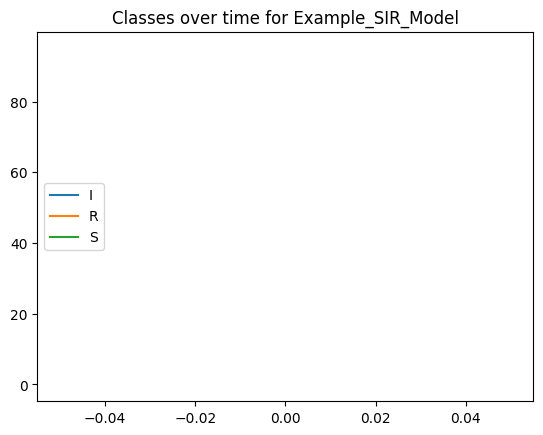

Finishing model simulation early.
No rules left to trigger - all rules have 0 propensity.
Ending model simulation
Simulation 2 has finished after 0 days, requiring 0 iterations and 0.00015700000221841037 secs of compute time


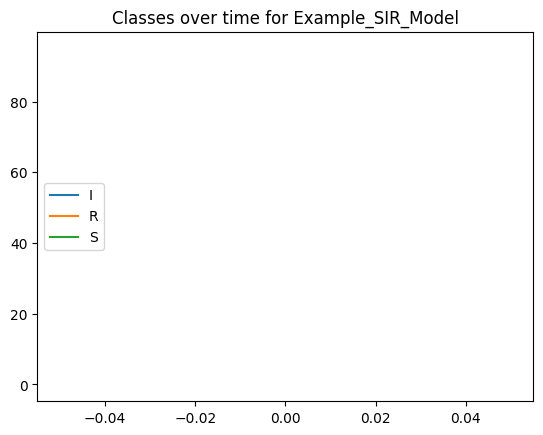

Finishing model simulation early.
No rules left to trigger - all rules have 0 propensity.
Ending model simulation
Simulation 3 has finished after 0 days, requiring 0 iterations and 0.0001446999958716333 secs of compute time


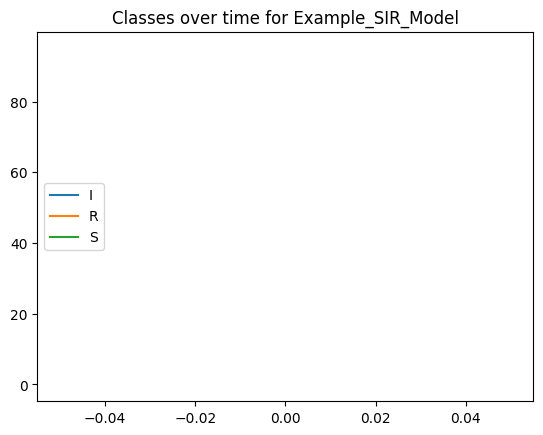

Finishing model simulation early.
No rules left to trigger - all rules have 0 propensity.
Ending model simulation
Simulation 4 has finished after 0 days, requiring 0 iterations and 0.0001328999933321029 secs of compute time


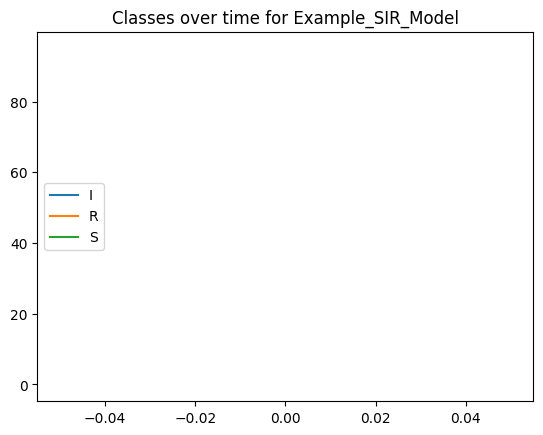

Finishing model simulation early.
No rules left to trigger - all rules have 0 propensity.
Ending model simulation
Simulation 5 has finished after 37.600000000000264 days, requiring 376 iterations and 0.02704099999391474 secs of compute time


Completed 5 simulations with the following stats:
Iterations:
   Mean: 75.2, Std: 150.4
Simulation Elapsed Time:
  Mean: 0.005544159997953102, Std: 0.010748492943629645


In [6]:
base_model.simulate(start_date, 40, 100000)
base_model.trajectory.plotAllClassesOverTime(0)
base_model.simulate(start_date, 40, 100000)
base_model.trajectory.plotAllClassesOverTime(0)
base_model.simulate(start_date, 40, 100000)
base_model.trajectory.plotAllClassesOverTime(0)
base_model.simulate(start_date, 40, 100000)
base_model.trajectory.plotAllClassesOverTime(0)
base_model.simulate(start_date, 40, 100000)

base_model.printSimulationPerformanceStats()

In [ ]:
base_model = Model.Model("Basic Epi Model")
base_model.buildModel(epiClasses, baseEpiRules, baseEpiLocations, write_to_file = False)
# Use no_rules_behaviour = "exit" when the model is constructed  such that states where the model has zero propensity are all
# absorbing states (e.g. models with no time based model state variables in any propensity).
base_model_solver = Solvers.GillespieSolver(debug=False, no_rules_behaviour="end")
base_model.initializeSolver(base_model_solver)

start_date = datetime.datetime(2001, 8, 1)

default_args = {"initial_infected" : 5,
                "total_population" : 100,
                "infectivity_rate" : 0.4,
                "recovery_rate" : 0.1,
                "mortality_rate" : 0.3,
                "additional_classes": []}

## Multi-Compartment

In [10]:
class EpiLocation(Compartments.Location):
    def __init__(self, lat, long, name:str, initial_infected, total_population, constants = None):
        # Provides a list of constants that should be set (optional, but will provide a useful error
        # message if unset).
        if constants is None:
            constants = ["infectivity_rate", "recovery_rate", "mortality_rate"]

        super().__init__(lat, long, name, comp_type="EpiComp", constants=constants)
        # Crops exist in three stages in this simplified model: planted, growing and harvested.
        class_labels = [class_entry[0] for class_entry in epiClasses]
        self.addClassLabels(class_labels)

        self.setInitialConditions({"S":total_population-initial_infected,
                                   "I":initial_infected})

def multipleEpiLocations(_):
    epi_locations = []
    region_constants_example_1 = {"infectivity_rate" : 0.4,
                                "recovery_rate" : 0.1,
                                "mortality_rate" : 0.3}
    
    region_constants_example_2 = {"infectivity_rate" : 0.7,
                                "recovery_rate" : 0.1,
                                "mortality_rate" : 0.3}
    
    region_constants_example_3 = {"infectivity_rate" : 1.3,
                                "recovery_rate" : 0.1,
                                "mortality_rate" : 0.3}

    region_constants_example_4 = {"infectivity_rate" : 2,
                                "recovery_rate" : 0.1,
                                "mortality_rate" : 0.3}
    
    region_constants_example_4 = {"infectivity_rate" : 3,
                                "recovery_rate" : 2,
                                "mortality_rate" : 0.3}
 
    region_vars = [[54.075, -2.75, "North East", 20, 10000, region_constants_example_1], 
                    [55, -1.87, "North West", 20, 10000, region_constants_example_2], 
                    [53.566667, -1.2, "Yorkshire & The Humber", 20, 40000, region_constants_example_3], 
                    [52.98, -0.75, "East Midlands", 20, 10000, region_constants_example_4],
                    [52.478861, -2.256306,"West Midlands", 20, 10000, region_constants_example_2],
                    [52.24, 0.41, "East of England", 20, 10000, region_constants_example_2],
                    [51.3, -0.8, "South East & London", 20, 100000, region_constants_example_2],
                    [50.96, -3.22, "South West", 20, 10000, region_constants_example_2],
                    [56.816738, -4.183963, "Scotland", 40, 10000, region_constants_example_1], 
                    [52.33022, -3.766409,"Wales", 30, 10000, region_constants_example_1]]
    
    for region_var in region_vars:
        epi_locations.append(EpiLocation(*region_var))

    return epi_locations

In [11]:
multi_model = Model.Model("Multi-Compartmental Epi Model")
# If we don't want to change the rules, we can reuse the old baseEpiRules function.
# Subrules are automatically created for EpiComp type compartment.
multi_model.buildModel(epiClasses, baseEpiRules, multipleEpiLocations, write_to_file = False)
multi_model_solver = Solvers.GillespieSolver(debug=False, no_rules_behaviour="end")
multi_model.initializeSolver(multi_model_solver)

start_date = datetime.datetime(2001, 8, 1)

Simulation 1 has finished after 40.00154424712137 days, requiring 351024 iterations and 44.369648400002916 secs of compute time


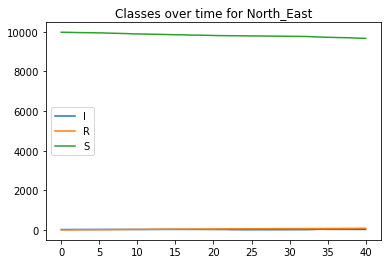

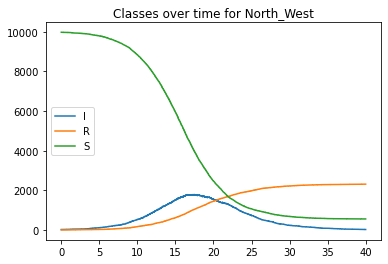

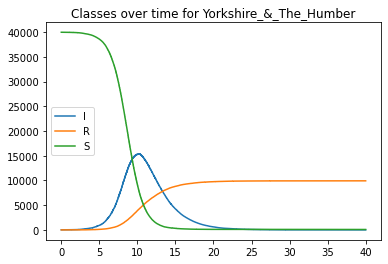

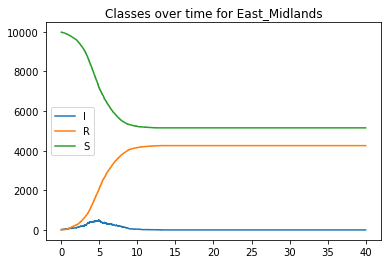

In [12]:
multi_model.simulate(start_date, 40, 500000)
multi_model.trajectory.plotAllClassesOverTime(0)
multi_model.trajectory.plotAllClassesOverTime(1)
multi_model.trajectory.plotAllClassesOverTime(2)
multi_model.trajectory.plotAllClassesOverTime(3)

The pyRBM implementation of the Gillespie algorithm utilses propensity caching. By observing which rules change which class values, and which rules utilse which class values in their propensities, we can precompute which rules need their propensities changing after a given rule is changed.

Asymtotically, this changes the runtime of the propensity update step of the Gillespie algorithm from roughly linear in the number of (sub)rules to 

In a model where most propensities are changing, this will not have a pronounced effect, however, in a multicompartmental model where the population from each compartment do not mix with other compartments, this caching can significantly reduce the runtime.

In [37]:
multi_model_solver_no_caching = Solvers.GillespieSolver(use_cached_propensities = False, debug=False, no_rules_behaviour="end")
multi_model.initializeSolver(multi_model_solver_no_caching)

Simulation 1 has finished after 40.00069283557763 days, requiring 349072 iterations and 214.72684600000048 secs of compute time


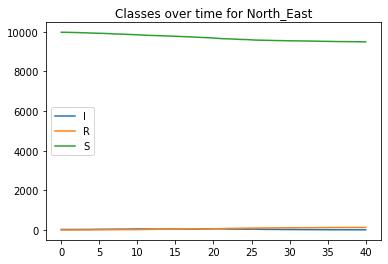

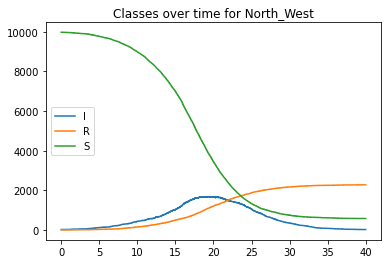

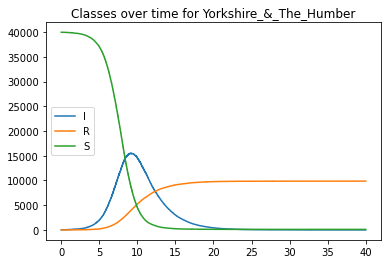

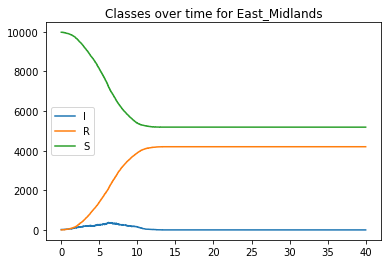

In [38]:
multi_model.simulate(start_date, 40, 500000)
multi_model.trajectory.plotAllClassesOverTime(0)
multi_model.trajectory.plotAllClassesOverTime(1)
multi_model.trajectory.plotAllClassesOverTime(2)
multi_model.trajectory.plotAllClassesOverTime(3)

We can further improve on the runtime in most cases by changing how we find which rule has been triggered.

If we cache both the propensity for a rule and the propensity for all subrules we first search for which rule was triggered, and then search for which subrule was triggered.

This idea is formalised and generalised in the HKO algorithm, whereby any ...

In [39]:
multi_model_solver_hko = Solvers.HKOSolver(debug=False, no_rules_behaviour="end")
multi_model.initializeSolver(multi_model_solver_hko)

Simulation 1 has finished after 40.00002372078498 days, requiring 349500 iterations and 42.67060059999949 secs of compute time


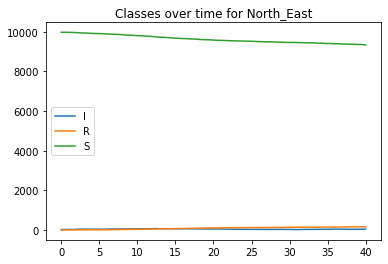

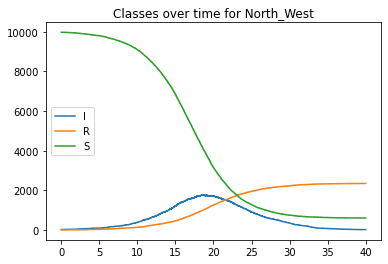

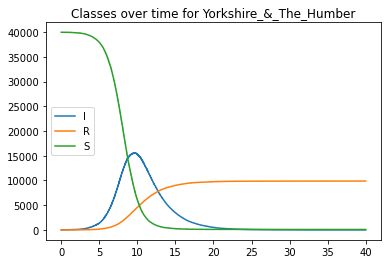

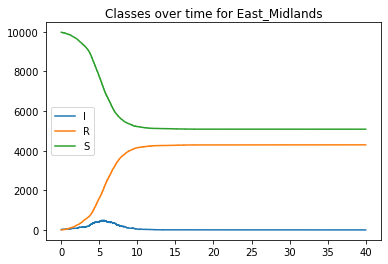

In [40]:
multi_model.simulate(start_date, 40, 500000)
multi_model.trajectory.plotAllClassesOverTime(0)
multi_model.trajectory.plotAllClassesOverTime(1)
multi_model.trajectory.plotAllClassesOverTime(2)
multi_model.trajectory.plotAllClassesOverTime(3)

## Spatial Effects

We can extend our model

Instead of using a distance kernel we can provide a constant

## Seasonal Effects

For simplicity, we will revisit the single compartment SIR model.

Say for example we know our disease is more infectious during the winter months. This is true of Influensa for example.

We can modify our Infection rule as follows


Note how we can break up the propensity function into multiple strings to improve readabillity. If we had many rules with similar propensities we can also reuse the parts of the propensity and improve maintainability of the model.

Also, even though the propensity expression for infection is not in the simplest form, pyRBM utilses SymPy to reduce the expression to the simplest form, ready for faster execution.

In [60]:
# While we don't need to change EpiCompartment as no class variables are added to the compartment, we do need to modify the 
def seasonalEpiLocations():
    single_epi_comp = EpiCompartment("Example_SIR_Model", initial_infected=5, total_population=10000,
                                     constants={"infectivity_rate" : 0.23,
                                                "recovery_rate" : 0.1,
                                                "mortality_rate" : 0.1,
                                                "winter_inf_factor":2}
                                    )
    return single_epi_comp

In [61]:
# If we wanted to 
def seasonalEpiRules():
    mass_action = "S*(I/(S+I+R))"
    winter_months = "(model_month_dec+model_month_jan+model_month_feb)"
    other_months = f"(1-{winter_months})"
    infection = BasicRules.SingleLocationProductionRule("EpiComp",
                                                        "S", 1,
                                                        "I", 1,
                                                       f"{mass_action}*comp_infectivity_rate*({winter_months}*comp_winter_inf_factor+{other_months})", ["S","I","R"],
                                                       "Infection of Susceptible")
    recovery = BasicRules.SingleLocationProductionRule("EpiComp",
                                                       "I", 1,
                                                       "R", 1,
                                                       "I*comp_recovery_rate", "I", 
                                                       "Recovery of Infected")
    death = BasicRules.ExitEntranceRule("EpiComp",
                                        "I", -1,
                                        "I*comp_mortality_rate", "I",
                                        "Death of Infected")
    return  (infection, recovery, death)

In [79]:
seasonal_model = Model.Model("Seasonal Epi Model")
seasonal_model.buildModel(epiClasses, seasonalEpiRules, seasonalEpiLocations, write_to_file = False)
# Use no_rules_behaviour = "exit" when the model is constructed  such that states where the model has zero propensity are all
# absorbing states (e.g. models with no time based model state variables in any propensity).
seasonal_model_solver = Solvers.GillespieSolver(debug=False, no_rules_behaviour="end")
seasonal_model.initializeSolver(base_model_solver)

start_date = datetime.datetime(2001, 2, 1)


Finishing model simulation early.
No rules left to trigger - all rules have 0 propensity.
Ending model simulation
Simulation 2 has finished after 95.91181621794205 days, requiring 16701 iterations and 1.2410435000001598 secs of compute time


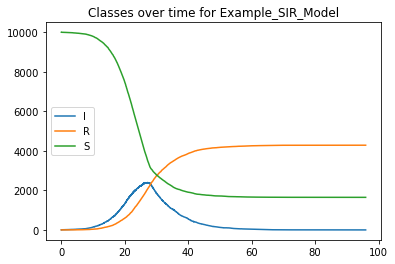

In [81]:
seasonal_model.simulate(start_date, 110, 50000)

seasonal_model.trajectory.plotAllClassesOverTime(0)

In [82]:
print(seasonal_model.trajectory.trajectory_compartment_values[0][-1])

[   0. 4283. 1647.]


## Final Size

Often in Epidemology, we would ask how many people were infected during the course of the outbreak. Formally, this is called the final size of the outbreak. 

In an SIR model without any death rules, this would be simply the number of the recovered class, R, at the last timestep (all infected people). However with the death rule, we have infected indiviudals who leave the system boundary and would not be included in this metric.

To address this, we could include dead individuals as part of system and introduce the D class. We would then sum the D class and the R class to work out the final size of the outbreak. This would work if all infected people either die from an infection or recover, however if we wanted to introduce demography or other final compartments we would have to change this again.

To introduce a general solution we could introduce a counter class I_count. We modify the stoichiometry of all incoming rules to the 

In [ ]:
new_epi_classes = epiClasses+["I_count"]
def epiCounterLocations()

## 

Instead of using a fixed cutoff like the previous model, we could instead use model_month. Note that this variable is integer valued, if a smoother propensity function is required, use mo

# Section 2: Economi